# Chargement des bibliothèques

In [1]:
# Classique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import os

# Import Yoann
import sys
import re
import string
!{sys.executable} -m pip install spacy
#import pandas as pd 
import re
import spacy
# !{sys.executable} -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# géométrie/algèbre
import sympy
from sympy import symbols, Eq, solve

# import francis 

from geotext import GeoText
import nltk # nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from better_profanity import profanity # importation du package

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Editeur
import warnings
warnings.filterwarnings('ignore')

# Chargement des données

In [2]:
url1 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/train.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
train = pd.read_csv(url1, sep=',') # lecture du dataframe 
# train = train.sample(1000).reset_index(drop=True)
print(train.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
url2 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/test.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
test = pd.read_csv(url2, sep=',') # lecture du dataframe 
# test = test.sample(200).reset_index(drop=True)
print(test.head())

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


# Analyse exploratoire

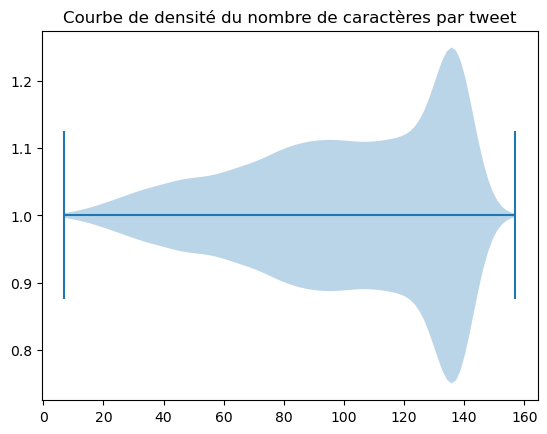

In [4]:
train['text_length'] = [len(text) for text in train['text']]
plt.violinplot(train['text_length'], vert = False)
plt.title('Courbe de densité du nombre de caractères par tweet')
plt.show()

In [5]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [6]:
train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [7]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(train, x="text_length",
                   marginal="box", # or violin, rug
                   hover_data=train.columns)
fig.show()

In [8]:
train['tweet_qcut'] = pd.qcut(train.text_length, 3, labels=[0, 1, 2])


print(train['tweet_qcut'])

0       0
1       0
2       2
3       0
4       0
       ..
7608    0
7609    1
7610    0
7611    2
7612    1
Name: tweet_qcut, Length: 7613, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [9]:
train['tweet_cut'] = pd.cut(train.text_length, [0,80,120,150], include_lowest=True, labels=[0, 1, 2])


print(train['tweet_cut'])

0       0
1       0
2       2
3       0
4       1
       ..
7608    1
7609    2
7610    0
7611    2
7612    1
Name: tweet_cut, Length: 7613, dtype: category
Categories (3, int64): [0 < 1 < 2]


#Extraction des parties des tweets


In [10]:
# Correction orthographique

# Conversion chiffres en texte

# Date

# Hashtag

# Liens hypertextes

# Contenu textuel

# Noms profils

# Enrichissement de la localisation

In [11]:
train['location'] = train['location'].astype(str)


def precision(text):
    rep = '0'
    reg1 = r'(,)'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
      rep = '1'
    return rep

def city(tweet):
    tweet.capitalize()
    places = GeoText(tweet)
    if len(places.cities) == 0:
        cities = 0
    else:
        cities = 1
    return cities

def country(tweet):
    tweet.capitalize()
    places = GeoText(tweet)
    if len(places.countries) == 0:
        countries = 0
    else:
        countries = 1
    return countries

In [12]:
# Récupération des hashtag

def recupHashtag(text):
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupHashtagBinaire(text):
    rep = '0'
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep


In [13]:
def recupName(text):
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupNameBinaire(text):
    rep = '0'
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
        


In [14]:
def recupDate(text):
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        return ge

def recupDateBinaire(text):
    rep = '0'
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
    


In [15]:
def getChemin(text):
    reg1 = r'(https?:\/\/[^\s]+)'
    reg2 = r'(https?)://([^:/]+)(?::(\d+))?(/[^?]*)?(\?[^#]*)?(#.*)?'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
        ge = p.findall(text)
        for val in ge:
            match = re.search(reg2,val)
            if match:
                rt = match.group(4)
            return rt

def getCheminBinaire(text):
    rep = '0'
    reg1 = r'(https?:\/\/[^\s]+)'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
      rep = '1'
    return rep

In [16]:
def getLocation(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            save.append(ent.text)
    return save

In [17]:
def getLocationBinaire(text):
    rep = "0"
    global nlp
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            rep = "1"
    return rep

In [18]:
def sentiment_tweet(tweet):
    from nltk.sentiment import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    if sia.polarity_scores(tweet)["compound"] > 0:
        nltk_val = 1
    elif sia.polarity_scores(tweet)["compound"] < 0:
        nltk_val = 2
    else:
        nltk_val = 0
    return nltk_val

In [19]:
def profanity(text):
    from better_profanity import profanity 
    check = profanity.contains_profanity(text)
    if check == "false":
        profanity = 0
    else:
        profanity = 1
    return(check)

In [20]:
from textblob import TextBlob

def getSubjectivity(text):
    subj = TextBlob(text).sentiment.subjectivity
    if subj < 0:
        score = 2
    elif subj == 0:
        score = 0
    else:
        score = 1
    return score


  
def getPolarity(text):
    polar = TextBlob(text).sentiment.polarity
    if polar < 0:
        score = 2
    elif polar == 0:
        score = 0
    else:
        score = 1
    return score


In [21]:
train['TextBlob_Subjectivity'] = train['text'].apply(getSubjectivity)
train ['TextBlob_Polarity'] = train['text'].apply(getPolarity)


test['TextBlob_Subjectivity'] = test['text'].apply(getSubjectivity)
test['TextBlob_Polarity'] = test['text'].apply(getPolarity)


In [22]:
train["sentiment_tweet"] = train["text"].apply(sentiment_tweet)

test["sentiment_tweet"] = test["text"].apply(sentiment_tweet)



In [23]:
train["profanity"] = train["text"].apply(profanity)
test["profanity"] = test["text"].apply(profanity)

In [24]:
train['city'] = train['location'].apply(city)

train['country'] = train['location'].apply(country)

train['precision'] = train['location'].apply(precision)

In [25]:
train['hashtags'] = train['text'].apply(recupHashtag)
train['hashtags_b'] = train['text'].apply(recupHashtagBinaire)

train['names'] = train['text'].apply(recupName)
train['names_b'] = train['text'].apply(recupNameBinaire)

train['dates'] = train['text'].apply(recupDate)
train['dates_b'] = train['text'].apply(recupDateBinaire)

train['locations'] = train['text'].apply(getLocation)
train['locations_b'] = train['text'].apply(getLocationBinaire)

train['rt_path'] = train['text'].apply(getChemin)
train['rt_path_b'] = train['text'].apply(getCheminBinaire)

In [26]:
test['hashtags'] = test['text'].apply(recupHashtag)
test['hashtags_b'] = test['text'].apply(recupHashtagBinaire)

test['names'] = test['text'].apply(recupName)
test['names_b'] = test['text'].apply(recupNameBinaire)

test['dates'] = test['text'].apply(recupDate)
test['dates_b'] = test['text'].apply(recupDateBinaire)

test['locations'] = test['text'].apply(getLocation)
test['locations_b'] = test['text'].apply(getLocationBinaire)

test['rt_path'] = test['text'].apply(getChemin)
test['rt_path_b'] = test['text'].apply(getCheminBinaire)

In [27]:
test

id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  \
0                    Just happened a terrible car crash   
1     Heard about #earthquake is different cities, s...   
2     there is a forest fire at spot pond, geese are...   
3              Apocalypse lighting. #Spokane #wildfires   
4         Typhoon Soudelor kills 28 in China and Taiwan   
...                                                 ...   
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...   
3259  Storm in RI worse than last hurricane. My city...   
3260  Green Line derailment in Chicago http://t.co/U...   
3261  MEG issues Hazardous Weather Outlook (HWO) htt...   
3262  #CityofCalgary has activated its Municipal Eme...   

      TextBlob_Subjectivity  TextBlob_Polarity  sentiment_tweet  profanity  \
0                         1                  2                2      False   
1                         1                  1                1      False   
2                         0                  0                2      False   
3                         0                  0                0      False   
4                         0                  0                2      False   
...                     ...                ...              ...        ...   
3258                      0                  0                1      False   
3259                      1                  2                2      False   
3260                      1                  2                0      False   
3261                      1                  1                0      False   
3262                      0                  0                2      False   

                    hashtags hashtags_b names names_b dates dates_b  \
0                       None          0  None       0  None       0   
1                 earthquake          1  None       0  None       0   
2                       None          0  None       0  None       0   
3          Spokane wildfires          1  None       0  None       0   
4                       None          0  None       0  None       0   
...                      ...        ...   ...     ...   ...     ...   
3258                    None          0  None       0  None       0   
3259                    None          0  None       0  None       0   
3260                    None          0  None       0  None       0   
3261                    None          0  None       0  None       0   
3262  CityofCalgary yycstorm          1  None       0  None       0   

            locations locations_b      rt_path rt_path_b  
0                  []           0         None         0  
1                  []           0         None         0  
2                  []           0         None         0  
3                  []           0         None         0  
4     [China, Taiwan]           1         None         0  
...               ...         ...          ...       ...  
3258               []           0         None         0  
3259             [RI]           1         None         0  
3260        [Chicago]           1  /UtbXLcBIuY         1  
3261               []           0  /3X6RBQJHn3         1  
3262               []           0         None         0  

[3263 rows x 18 columns]

In [28]:
pd.crosstab(train.rt_path, train.target, margins=True, margins_name="Total").sort_values('Total', ascending=False)

target          0     1  Total
rt_path                       
Total        1797  2172   3969
/qew4c5M1xd     9     0      9
/KSAwlYuX02     0     6      6
/q2eBlOKeVE     5     1      6
/vVPLFQv58P     0     5      5
...           ...   ...    ...
/L2NMywrmq2     1     0      1
/L53OABEqc9     0     1      1
/L6nSLzl7mI     0     1      1
/L8W30WFW3R     0     1      1
/VBsj8tniv1     0     1      1

[3874 rows x 3 columns]

#Nettoyage du contenu textuel des tweets

## Prenettoyage

In [29]:
# Expression régulières : ponctuation, chiffres, accents, majuscules, espaces en trop …
import re
def preprocessing(text):
    text = str(text)

    # Harmonisation - mise en minuscule
    text = text.lower()

    # Gestion des accents et ponctuations
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub("\d+", " ", text) # normalisation nombres
    text = re.sub('[éèê]', "e", text) # retrait accents
    text = re.sub("[.,;:!?]", " ", text)
    text = re.sub("[|{}\[\]()«»/]", " ", text)
    text = re.sub("[“”]", " ", text)
    text = re.sub("'", " ", text)
    text = re.sub("’", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub('[+-]', " ", text)
    text = re.sub('[=*/]', " ", text)
    text = re.sub("ô", "o", text)
    text = re.sub("°", "", text)

    # Gestion des symboles
    text = re.sub("[€%$£]", "", text)

    # Gestions des retours à la ligne ou fin de lignes
    text = re.sub('\r\n', " ", text)
    text = re.sub('\n', " ", text)

    # Gestion des espaces
    text = re.sub('\s+', " ", text) # espaces en trop
    text = text.rstrip(" ") # à droite
    text = text.lstrip(" ") # à gauche

    return text

In [30]:
train['text_CLEAN'] = train['text'].apply(lambda x: preprocessing(x))
test['text_CLEAN'] = test['text'].apply(lambda x: preprocessing(x))
train[['text','text_CLEAN']].sample(10)

text  \
4199  December 2011 court dismissed the group charge...   
7126  Jetstar and Virgin forced to cancel Bali fligh...   
1098  I can't believe @myfriendmina photo bombed a s...   
7130  Maailiss: Diaporama : sixpenceee: Karymsky Lak...   
3450  If you told me ten years ago that I'd be seein...   
4556  Udhampur terror attack: Militants attack polic...   
5201  Drunk Meals 101: What To Cook When You're Tota...   
1964  Back to the future in #Vanuatu how Cyclone Pam...   
5106  Fukushima: The Story of a Nuclear Disaster htt...   
1262  Hinton city officials confirm multiple buildin...   

                                             text_CLEAN  
4199  december court dismissed the group charge of r...  
7126  jetstar and virgin forced to cancel bali fligh...  
1098          i can t believe photo bombed a screenshot  
7130  maailiss diaporama sixpenceee karymsky lake is...  
3450  if you told me ten years ago that i d be seein...  
4556  udhampur terror attack militants attack police...  
5201  drunk meals what to cook when you re totally o...  
1964  back to the future in how cyclone pam has enco...  
5106          fukushima the story of a nuclear disaster  
1262  hinton city officials confirm multiple buildin...

## Lemmatisation / Stemmisation

In [31]:
# !pip install nltk
import nltk
# nltk.download('all')

In [32]:
# !pip install -U spacy
# !pip install -U spacy-lookups-data
# !python -m spacy download en_core_web_sm

In [33]:
import tqdm
def Lemmatization(train,texts):
    pbar = tqdm.tqdm(total=train.shape[0])
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc: 
            new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
        pbar.update(1) # actualise la progress bar
    return (texts_out)
    pbar.close()

train['text_CLEAN_LMT'] = Lemmatization(train,train['text_CLEAN'])
test['text_CLEAN_LMT'] = Lemmatization(test,test['text_CLEAN'])
train[['text_CLEAN','text_CLEAN_LMT']].head()

100%|█████████████████████████████████████████████████████████████████████████████| 3263/3263 [00:21<00:00, 152.28it/s]


text_CLEAN  \
0  our deeds are the reason of this may allah for...   
1              forest fire near la ronge sask canada   
2  all residents asked to shelter in place are be...   
3     people receive evacuation orders in california   
4  just got sent this photo from ruby as smoke fr...   

                                      text_CLEAN_LMT  
0  our deed be the reason of this may allah forgi...  
1              forest fire near la ronge sask canada  
2  all resident ask to shelter in place be be not...  
3      people receive evacuation order in california  
4  just get send this photo from ruby as smoke fr...

In [34]:
# Pour cette partie du traitement, les tweets doivent être décomposés en mots
def tokenize(text):
    text_split = [word for word in text.split()]
    return text_split

train['text_CLEAN_LMT_TOKEN'] = train['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
test['text_CLEAN_LMT_TOKEN'] = test['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
train[['text_CLEAN_LMT','text_CLEAN_LMT_TOKEN']].head()

text_CLEAN_LMT  \
0  our deed be the reason of this may allah forgi...   
1              forest fire near la ronge sask canada   
2  all resident ask to shelter in place be be not...   
3      people receive evacuation order in california   
4  just get send this photo from ruby as smoke fr...   

                                text_CLEAN_LMT_TOKEN  
0  [our, deed, be, the, reason, of, this, may, al...  
1      [forest, fire, near, la, ronge, sask, canada]  
2  [all, resident, ask, to, shelter, in, place, b...  
3  [people, receive, evacuation, order, in, calif...  
4  [just, get, send, this, photo, from, ruby, as,...

## Retrait des stopwords

In [35]:
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

stopwords = [word.lower() for word in stopwords]

# conservation de certains stopwords
liste = [
    # mots à conserver (à exclure de la liste des stopwords par défaut)
]

stopwords = [word for word in stopwords if word not in liste]

In [36]:
def remove_stopwords(text):
    text = [word for word in text if (len(word) > 2) and (word not in stopwords)]
    return text

train['text_CLEAN_LMT_TOKEN_WSW'] = train['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
test['text_CLEAN_LMT_TOKEN_WSW'] = test['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
train[['text_CLEAN_LMT_TOKEN','text_CLEAN_LMT_TOKEN_WSW']].head()

text_CLEAN_LMT_TOKEN  \
0  [our, deed, be, the, reason, of, this, may, al...   
1      [forest, fire, near, la, ronge, sask, canada]   
2  [all, resident, ask, to, shelter, in, place, b...   
3  [people, receive, evacuation, order, in, calif...   
4  [just, get, send, this, photo, from, ruby, as,...   

                            text_CLEAN_LMT_TOKEN_WSW  
0                     [deed, reason, allah, forgive]  
1          [forest, fire, near, ronge, sask, canada]  
2  [resident, ask, shelter, place, notify, office...  
3   [people, receive, evacuation, order, california]  
4           [send, photo, ruby, smoke, pour, school]

## Bigrammes - Trigrammes

S'effectue sur donneés tokenizées

Astuce : la construction des bigrammes peut s'effectuer en ignorant les stopwords grâce au paramètre "connector_words". Du coup on précise d'abord la liste des stopwords afin que ces stopwords ne se retrouvent pas dans des bigrammes.

In [37]:
import gensim

### TRAIN

data_words_train = train['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_train

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_train, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_train], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Fonctions retournant les bigrammes/trigrammes
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Crée les bigrammes
data_words_train_bigrams = make_bigrams(data_words_train)
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_train_bigrams
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]


### TEST

data_words_test = test['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_test

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_test, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_test], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Crée les bigrammes
data_words_test_bigrams = make_bigrams(data_words_test)
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_test_bigrams
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]

0                       [happen, terrible, car, crash]
1                  [hear, different, city, stay, safe]
2    [forest_fire, spot, pond, geese, flee, street,...
3                               [apocalypse, lighting]
4              [typhoon_soudelor, kill, china, taiwan]
Name: text_CLEAN_LMT_TOKEN_WSW_BIGRAMS, dtype: object

## Detokenization

In [38]:
def detokenize_text(txt):
    txt = ' '.join([word for word in txt])
    return txt

train['text_CLEAN_LMT_WSW_BIGRAMS'] = train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
test['text_CLEAN_LMT_WSW_BIGRAMS'] = test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
train[['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS','text_CLEAN_LMT_WSW_BIGRAMS']].head()

text_CLEAN_LMT_TOKEN_WSW_BIGRAMS  \
0                     [deed, reason, allah, forgive]   
1           [forest_fire, near, ronge, sask, canada]   
2  [resident, ask, shelter, place, notify, office...   
3    [people, receive, evacuation_order, california]   
4           [send, photo, ruby, smoke, pour, school]   

                          text_CLEAN_LMT_WSW_BIGRAMS  
0                          deed reason allah forgive  
1                 forest_fire near ronge sask canada  
2  resident ask shelter place notify officer evac...  
3         people receive evacuation_order california  
4                  send photo ruby smoke pour school

# Nuage de mots TF-IDF

# Modélisation

## Feature engineering

Ici la sélection de variable consiste à conserver ou non certains mots.

On peut supprimer les mots dont l'occurence est si rare que leur conservation serait source d'overfitting.

Pour choisir ces mots, on peut utiliser le TF_Itrain, une grandeur qui pondère la fréquence d'un mot au sein d'un texte par rapport à sa fréquence dans un ensemble de texte.

En résumé, un mot fréquent dans un texte mais qui l'est également dans tous les textes sera pénalisé, alors qu'un mot fréquent uniquement dans un texte sera favorisé. Cela permet de mettre en avant les mots qui aident à distinguer les textes entre eux, et donc contribuent à une meilleure classification.

In [39]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Création d'une table dont les colonnes sont les mots et les données sont les valeurs TF-Itrain
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS'].astype('U'))
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()

train_Tfidf = pd.DataFrame(dense, columns=feature_names)

# Détection des mots dont la valeur TF-Itrain est peu signifiante au sein du corpus

## Dataframe contenant chaque mot et leur TF-Itrain moyen
mean_Tfidf = []
for feature in train_Tfidf.columns.values:
    mean_Tfidf.append(np.mean(train_Tfidf[feature]))
    
train_mean_Tfidf = pd.DataFrame({'word': train_Tfidf.columns.values,'mean_Tfidf': mean_Tfidf})

## Liste contenant les mots dont le TF-Itrain moyen est inférieur à un seuil prédéfini
threshold = np.percentile(train_mean_Tfidf['mean_Tfidf'],10) # on retire les X % plus bas en terme de TF-Itrain
features_to_delete = train_mean_Tfidf['word'].loc[train_mean_Tfidf['mean_Tfidf'] < threshold]

## Suppression de ces mots des texts. On met à jour la liste des stopwords avec les mots rares que l'on souhaite exclure.
for feature in features_to_delete:
    stopwords.extend(feature)

# On tokenize, on supprime les stopwords, et on détokenize
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = [text.split() for text in train['text_CLEAN_LMT_WSW_BIGRAMS'].astype(str)]  # le as.type(str) convertit en texte car apres nettoyage, certains tweets ne contiennent parfois plus que des numéros 
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(remove_stopwords)
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(lambda x: detokenize_text(x))

# Affichage du nombre de features final
print('total de feature =', train_Tfidf.shape[1])
print(features_to_delete)

# Création d'un dataframe contenant les mots en tant que features TF-IDF
train_word_features = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'])
feature_names = vectorizer.get_feature_names_out()
dense = train_word_features.todense()
train_word_features = pd.DataFrame(dense, columns=feature_names)

##################################################################################################

# LE NOMBRE DE FEATURE DONNE UNE IDEE DE LA COMPLEXITE DU MODELE
# IL FAUT LE REDUIRE AU STRICT NECESSAIRE POUR GARANTIR UN BON POUVOIR DE GENERALISATION

##################################################################################################

total de feature = 10928
5              aan
7              aar
42         accepte
50       accidents
60             ace
           ...    
10907     ûïnobody
10912     ûïsippin
10914       ûïthat
10920        ûòthe
10923        ûóher
Name: word, Length: 1090, dtype: object


## GridSearch

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import GridSearchCV

X_train = pd.concat([train_word_features, train[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

y_train = train['target']


#clf = RandomForestClassifier(n_estimators=5000, random_state=0)
pipe = Pipeline([
    ("TdIdf",TfidfTransformer()),
    ("scaler", StandardScaler(with_mean=False)), # mean = True ne fonctionne pas avec une sparse matrix (TD-IDF)

    # Modèle testé en premier (n'importe lequel)
    ("classifier", LogisticRegression(random_state=0))
    #("clf",clf)
    
])

param_grid = [
    # Régression Logistique (one vs rest)
    #{'classifier': [RandomForestClassifier(random_state=0)],
    # 'classifier__C': [1,10,100]},
    # {'classifier': [LogisticRegression(random_state=0)],
    #  'classifier__C': [1,10,100, 1000, 10000]},

    # Support Vector Machine
    {'classifier': [SVC(kernel='rbf', random_state=0, probability = True)],
     'classifier__C': [0.1,1,10,100,1000,10000]},
    
    # {'classifier': [MLPClassifier(random_state = 0,
    #                         max_iter = 10,
    #                         alpha = 1,
    #                         hidden_layer_sizes=(100,))]},
    #  {'classifier': [RandomForestClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [AdaBoostClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [GradientBoostingClassifier(n_estimators=100, random_state=0)]},
             ]

grid = GridSearchCV(pipe, param_grid, verbose = 2, cv = 5) # verbose pour l'affichage du temps de traitement
grid.fit(X_train, y_train)

## Evaluation

In [40]:
print('best model : ', grid.best_params_)
print('best cv score : ', grid.best_score_)

NameError: name 'grid' is not defined

## Récupération des prédictions

In [ ]:
test_word_features = vectorizer.transform(test['text_CLEAN_LMT_WSW_BIGRAMS'].values.astype(str))
feature_names = vectorizer.get_feature_names_out()
dense = test_word_features.todense()
test_word_features = pd.DataFrame(dense, columns=feature_names)

X_test = pd.concat([test_word_features, test[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

test_predictions_tab = pd.DataFrame(grid.predict(X_test)) \
                            .reset_index(drop=True).rename(columns={0 : 'target_prédite'})

test_probas_tab = pd.DataFrame(grid.predict_proba(X_test), columns=[grid.classes_])

test_results = pd.concat([test[['id','text']],
                          test_predictions_tab,
                          test_probas_tab],
                          axis=1).dropna() # probas et prédictions

test_results.dropna().to_csv('test_results.csv',sep=';',encoding='utf-16')

test_results

In [ ]:
submission = test_results.rename(columns = {'target_prédite' : 'target'})
submission = submission[['id','target']].set_index('id')
submission
submission.to_csv('submission.csv')

In [ ]:
test